# Comparación iespnet contra dsf-iespnet

In [1]:
import sys
import os

import pandas   as pd
import numpy    as np
import seaborn  as sns

import matplotlib.pyplot        as plt
import matplotlib.font_manager  as fm

from matplotlib.lines     import Line2D
from utilit_espectrograms import get_bool_mask_stim_artifact
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
spe_dir_dsf_iespnet = '/media/martin/Disco2/Rns_Data/PITT_PI_EEG/'
spe_dir_iespnet     = '/media/martin/Disco2/Rns_Data/PITT_PI_SPEC/'

In [4]:
meta_data_dsf_iespnet = '/media/martin/Disco2/Rns_Data/PITT_PI_EEG/METADATA/allfiles_metadata.csv' 
meta_data_iespnet     = '/media/martin/Disco2/Rns_Data/PITT_PI_SPEC/METADATA/allfiles_metadata.csv'

df_meta_dsf_iespnet   = pd.read_csv(meta_data_dsf_iespnet)
df_meta_iespnet       = pd.read_csv(meta_data_iespnet)

In [5]:
patients_dsf_iespnet  = df_meta_dsf_iespnet['rns_id'].unique().tolist()
save_path_dsf_iespnet = '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo'

patients_iespnet      = df_meta_iespnet['rns_id'].unique().tolist()
save_path_iespnet     = '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo'

In [6]:
# save results
save_results_dsf_iespnet = []
for s in range(len(patients_dsf_iespnet)):
    save_results_dsf_iespnet.append(save_path_dsf_iespnet + '/' + patients_dsf_iespnet[s] + '/results/' + 'results.npy')

save_results_iespnet = []
for s in range(len(patients_iespnet)):
    save_results_iespnet.append(save_path_iespnet + '/' + patients_iespnet[s] + '/results/' + 'results.npy')

In [7]:
results_dsf_iespnet = []
for s in range(len(save_results_dsf_iespnet)):
    results_dsf_iespnet.append(np.load(save_results_dsf_iespnet[s],allow_pickle=True).item())

results_iespnet=[]
for s in range(len(save_results_iespnet)):
    results_iespnet.append(np.load(save_results_iespnet[s],allow_pickle=True).item())

In [8]:
prediction_te_dsf_iespnet = []
for s in range (len(results_dsf_iespnet)):
    prediction_te_dsf_iespnet.append(results_dsf_iespnet[s].get('prediction_te'))

prediction_te_iespnet = []
for s in range (len(results_iespnet)):
    prediction_te_iespnet.append(results_iespnet[s].get('prediction_te'))

In [9]:
accuracy_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    accuracy_dsf_iespnet.append(float(prediction_te_dsf_iespnet[s].get('accuracy')))
    
f1_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    f1_dsf_iespnet.append(float(prediction_te_dsf_iespnet[s].get('f1')))

MAE_time_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    MAE_time_dsf_iespnet.append(float(prediction_te_dsf_iespnet[s].get('MAE_time')))

In [10]:
accuracy_iespnet = []
for s in range (len(prediction_te_iespnet)):
    accuracy_iespnet.append(float(prediction_te_iespnet[s].get('accuracy')))
    
f1_iespnet = []
for s in range (len(prediction_te_iespnet)):
    f1_iespnet.append(float(prediction_te_iespnet[s].get('f1')))

MAE_time_iespnet = []
for s in range (len(prediction_te_iespnet)):
    MAE_time_iespnet.append(float(prediction_te_iespnet[s].get('MAE_time')))

In [11]:
stim_time_prom_all_epochs =[
                            np.float64(8.103587731529542),
                            np.float64(5.609574317107305),
                            np.float64(5.046710394293466),
                            np.float64(6.264846071984974),
                            np.float64(3.4423097340695836),
                            np.float64(6.865549872683092),
                            np.float64(8.991780175663585),
                            np.float64(6.995453320752558),
                            np.float64(4.825703435647157),
                            np.float64(6.611271906634403),
                            np.float64(4.232075111890957),
                            np.float64(17.92568056212078),
                            np.float64(19.973124898641327),
                            np.float64(10.371449197243468),
                            np.float64(10.54792206295759),
                            np.float64(1.4778359899089644),
                            np.float64(14.390765757280729),
                            np.float64(10.864181333333335),
                            np.float64(11.59127035426953),
                            np.float64(4.970784614474068),
                            np.float64(7.156983178830271),
                            np.float64(21.187505609644223),
                            np.float64(5.759221874105497),
                            np.float64(2.5478816175052095),
                            np.float64(16.994966053671092),
                            np.float64(14.770183459835556),
                            np.float64(6.446452282903404),
                            np.float64(6.509686991165258),
                            np.float64(10.941823250597965),
                            np.float64(0.9920650339921602)
                           ]

In [121]:
variable_relativa_f1       = (np.array(f1_dsf_iespnet)-np.array(f1_iespnet))/np.array(f1_iespnet)
variable_relativa_accuracy = (np.array(accuracy_dsf_iespnet)-np.array(accuracy_iespnet))/np.array(accuracy_iespnet)

In [122]:
# agregar los tiempos de padding

In [123]:
df_resultados = pd.DataFrame({
                              'patients'                : patients_dsf_iespnet,
                              'Accuracy'                : accuracy_dsf_iespnet, 
                              'F1'                      : f1_iespnet, 
                              'Tiempo de estimulación'  : stim_time_prom_all_epochs,
                              'Relativa_f1'             : variable_relativa_f1,
                              'Relativa_accuracy'       : variable_relativa_accuracy
                            })
df_resultados

,patients,Accuracy,F1,Tiempo de estimulación,Relativa_f1,Relativa_accuracy
0,PIT-RNS1603,0.877947,0.806252,8.103588,0.029219,0.107372
1,PIT-RNS6989,0.971544,0.870045,5.609574,0.039601,0.025890
2,PIT-RNS3016,0.676442,0.659410,5.046710,-0.100081,0.006654
3,PIT-RNS1529,0.904922,0.932166,6.264846,-0.039936,-0.022310
4,PIT-RNS7168,0.649294,0.618873,3.442310,0.104260,0.112939
5,PIT-RNS4098,0.513172,0.427625,6.865550,0.248234,0.063281
6,PIT-RNS1836,0.625729,0.650445,8.991780,0.025498,-0.002098
7,PIT-RNS9183,0.891573,0.914993,6.995453,-0.028442,-0.023537
8,PIT-RNS1440,0.979252,0.979601,4.825703,-0.015246,0.005396
9,PIT-RNS1713,0.795788,0.730827,6.611272,0.012288,0.124191


In [124]:
print(
      patients_iespnet.index('PIT-RNS0427'),
      patients_iespnet.index('PIT-RNS1713'),  
      patients_iespnet.index('PIT-RNS3016'),
      patients_iespnet.index('PIT-RNS7168'),
      patients_iespnet.index('PIT-RNS8326'),
      patients_iespnet.index('PIT-RNS6762'),
     )

28 9 2 4 18 25


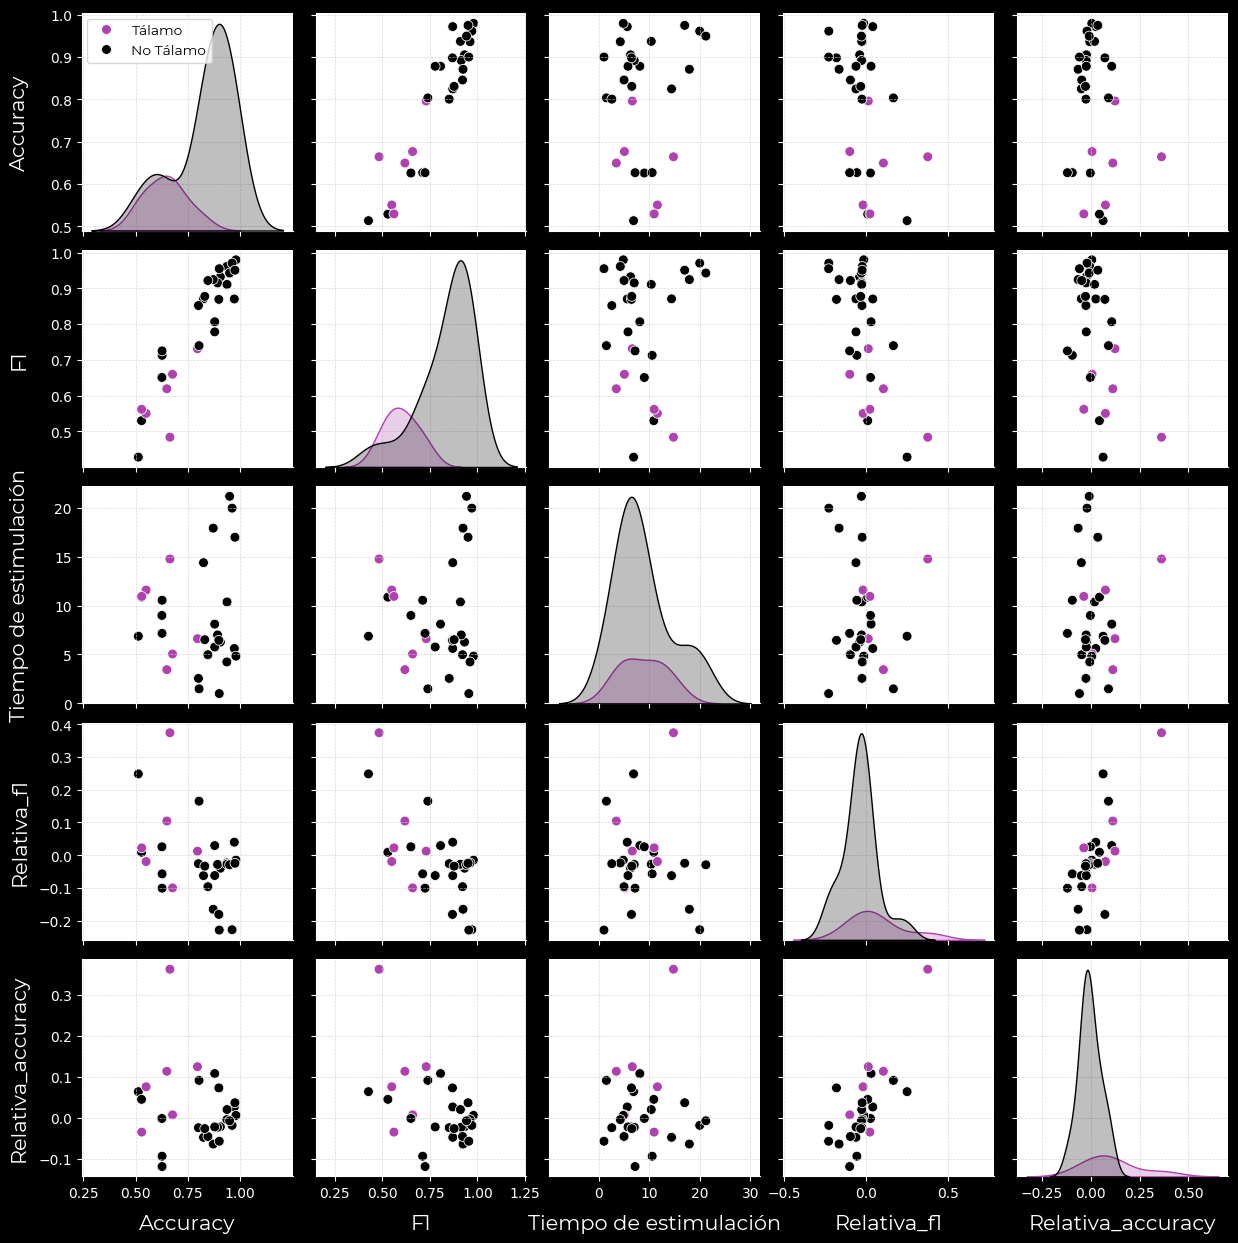

In [125]:
# Definir la fuente Montserrat
font_path = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

indices_resaltados = [28, 9, 2, 4, 18, 25]
df_resultados['Talamo'] = df_resultados.index.isin(indices_resaltados)

# Crear el pairplot
pairplot = sns.pairplot(
                        df_resultados,
                        hue       = 'Talamo',
                        palette   = {True: '#AF42AE', False: '#000000'}, 
                        diag_kind = "kde", 
                        plot_kws  = {'marker': 'o', 'facecolors': 'black', 'edgecolor': 'white', 's': 50},
                        diag_kws  = {'color':'#000000'}
                       )

pairplot.fig.patch.set_facecolor('#000000')  # Fondo negro fuera de los gráficos

for ax in pairplot.axes.flatten():
    ax.set_facecolor('#FFFFFF')  # Fondo blanco en los gráficos

for ax in pairplot.fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontproperties=montserrat, fontsize=15, color='#FFFFFF',labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), fontproperties=montserrat, fontsize=15, color='#FFFFFF',labelpad=10)

    # Cambiar color de los ejes (spines) a blanco
    ax.spines['bottom'].set_color('#FFFFFF')
    ax.spines['top'].set_color('#FFFFFF')
    ax.spines['left'].set_color('#FFFFFF')
    ax.spines['right'].set_color('#FFFFFF')

    # Cambiar el color de los ticks (números en los ejes) a blanco
    ax.tick_params(axis='x', colors='#FFFFFF')  # Eje X
    ax.tick_params(axis='y', colors='#FFFFFF')  # Eje Y

    ax.xaxis.label.set_color('#FFFFFF')  # Etiqueta eje X
    ax.yaxis.label.set_color('#FFFFFF')  # Etiqueta eje Y

    ax.yaxis.set_label_coords(-0.25, 0.5)

    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# Modificar la leyenda
legend = pairplot._legend
legend.set_frame_on(True)

legend.get_frame().set_facecolor('#FFFFFF')  
legend.set_title('', prop = montserrat)

# Personalizar los textos de la leyenda
for text in legend.get_texts():
    text.set_fontproperties(montserrat)  # Cambiar la fuente a Montserrat
    text.set_color('#000000')  # Color del texto de la leyenda

# Cambiar el color de los puntos de la leyenda
legend.legend_handles[0].set_markerfacecolor('#AF42AE')  # Talamo
legend.legend_handles[1].set_markerfacecolor('#000000')  # No Talamo

# Eliminar el texto de 'False' en la leyenda
legend.texts[0].set_text('Tálamo')  
legend.texts[1].set_text('No Tálamo')

# Ubicar la leyenda en la parte superior izquierda
legend.set_bbox_to_anchor((0.06, 0.985))  # Ajusta las coordenadas según sea necesario
legend.set_loc('upper left')  

plt.show()

## Agregar padding